# Input dataset

## List of pokemon 
Folder named as index_pokemon name

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import build_opener
from urllib.request import install_opener
import os
import pathlib
from PIL import Image
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

In [2]:
opener = build_opener()
opener.addheaders = [('User-Agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36')]
install_opener(opener)

In [3]:
list_of_pokemon_api = "https://pokemon.fandom.com/wiki/List_of_Pok%C3%A9mon#Generation_II"
r = requests.get(list_of_pokemon_api)
print(r.status_code)
print(type(r))

200
<class 'requests.models.Response'>


In [4]:
html_doc = r.text

In [5]:
soup = BeautifulSoup(html_doc)

In [6]:
list_of_pokemon_name = "td~ td+ td > a"
name = soup.select(list_of_pokemon_name)
name_list = []
for i in range(len(name)):
    name_list.append(name[i].text)
# name_list

In [7]:
list_of_pokemon_index = ".wikitable td:nth-child(1)"
index = soup.select(list_of_pokemon_index)
index_list = []
for i in range(len(index)):
    ind = index[i].text.strip()
    index_list.append(ind)
# index_list

In [8]:
name_list[771] = 'Type_Null'

In [9]:
folder_name_list = []
for i in range(len(index_list)):
    folder_name_list.append(index_list[i] + '_' + name_list[i])
# folder_name_list

## caculating the amount of the images

In [10]:
train_dir = './Pokemon Dataset'
train_list = lambda name: os.path.join(train_dir, name)

total_train = 0
for name in folder_name_list:
    num_tr = len(os.listdir(train_list(name)))
    total_train += num_tr
    print("-----class:" + name)
    print("train:", num_tr)

print("-----Total:")
print("train:", total_train)

-----class:001_Bulbasaur
train: 55
-----class:002_Ivysaur
train: 13
-----class:003_Venusaur
train: 19
-----class:004_Charmander
train: 55
-----class:005_Charmeleon
train: 14
-----class:006_Charizard
train: 86
-----class:007_Squirtle
train: 25
-----class:008_Wartortle
train: 9
-----class:009_Blastoise
train: 24
-----class:010_Caterpie
train: 9
-----class:011_Metapod
train: 10
-----class:012_Butterfree
train: 57
-----class:013_Weedle
train: 8
-----class:014_Kakuna
train: 8
-----class:015_Beedrill
train: 11
-----class:016_Pidgey
train: 9
-----class:017_Pidgeotto
train: 10
-----class:018_Pidgeot
train: 10
-----class:019_Rattata
train: 20
-----class:020_Raticate
train: 15
-----class:021_Spearow
train: 10
-----class:022_Fearow
train: 8
-----class:023_Ekans
train: 10
-----class:024_Arbok
train: 11
-----class:025_Pikachu
train: 138
-----class:026_Raichu
train: 21
-----class:027_Sandshrew
train: 18
-----class:028_Sandslash
train: 18
-----class:029_Nidoran♀
train: 8
-----class:030_Nidorina
train

-----class:280_Ralts
train: 7
-----class:281_Kirlia
train: 8
-----class:282_Gardevoir
train: 21
-----class:283_Surskit
train: 6
-----class:284_Masquerain
train: 7
-----class:285_Shroomish
train: 7
-----class:286_Breloom
train: 7
-----class:287_Slakoth
train: 6
-----class:288_Vigoroth
train: 6
-----class:289_Slaking
train: 5
-----class:290_Nincada
train: 5
-----class:291_Ninjask
train: 5
-----class:292_Shedinja
train: 6
-----class:293_Whismur
train: 8
-----class:294_Loudred
train: 6
-----class:295_Exploud
train: 6
-----class:296_Makuhita
train: 7
-----class:297_Hariyama
train: 6
-----class:298_Azurill
train: 8
-----class:299_Nosepass
train: 7
-----class:300_Skitty
train: 10
-----class:301_Delcatty
train: 6
-----class:302_Sableye
train: 13
-----class:303_Mawile
train: 12
-----class:304_Aron
train: 8
-----class:305_Lairon
train: 6
-----class:306_Aggron
train: 9
-----class:307_Meditite
train: 9
-----class:308_Medicham
train: 9
-----class:309_Electrike
train: 5
-----class:310_Manectric
trai

-----class:654_Braixen
train: 10
-----class:655_Delphox
train: 10
-----class:656_Froakie
train: 6
-----class:657_Frogadier
train: 7
-----class:658_Greninja
train: 25
-----class:659_Bunnelby
train: 6
-----class:660_Diggersby
train: 3
-----class:661_Fletchling
train: 8
-----class:662_Fletchinder
train: 7
-----class:663_Talonflame
train: 6
-----class:664_Scatterbug
train: 4
-----class:665_Spewpa
train: 5
-----class:666_Vivillon
train: 24
-----class:667_Litleo
train: 6
-----class:668_Pyroar
train: 9
-----class:669_Flabébé
train: 12
-----class:670_Floette
train: 7
-----class:671_Florges
train: 11
-----class:672_Skiddo
train: 3
-----class:673_Gogoat
train: 6
-----class:674_Pancham
train: 7
-----class:675_Pangoro
train: 6
-----class:676_Furfrou
train: 17
-----class:677_Espurr
train: 7
-----class:678_Meowstic
train: 8
-----class:679_Honedge
train: 4
-----class:680_Doublade
train: 3
-----class:681_Aegislash
train: 6
-----class:682_Spritzee
train: 4
-----class:683_Aromatisse
train: 3
-----class:

In [11]:
num_list = []
for name in folder_name_list:
    num_list.append(len(os.listdir(train_list(name))))
np.unique(num_list, return_counts = True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  29,  30,  31,  32,  33,  35,  37,  41,  46,  51,  53,  55,
         56,  57,  59,  64,  71,  76,  86,  88, 138]),
 array([  1,   2,  71,  85,  89, 127,  84,  73,  74,  54,  35,  32,  19,
         13,  12,  10,  10,  19,  10,   7,   8,   3,   2,   4,   8,   6,
          2,   3,   1,   2,   2,   3,   3,   1,   1,   1,   1,   1,   2,
          1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=int64))

## plot first pokemon image and related info

In [12]:
pathlib.Path().absolute()

WindowsPath('C:/Users/songz/OneDrive/文件/University of bath 課程/semester 2/Research Project Preparation/dataset and code')

In [13]:
path = './Pokemon Dataset/{}'.format(folder_name_list[0])
path

'./Pokemon Dataset/001_Bulbasaur'

In [14]:
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
# onlyfiles

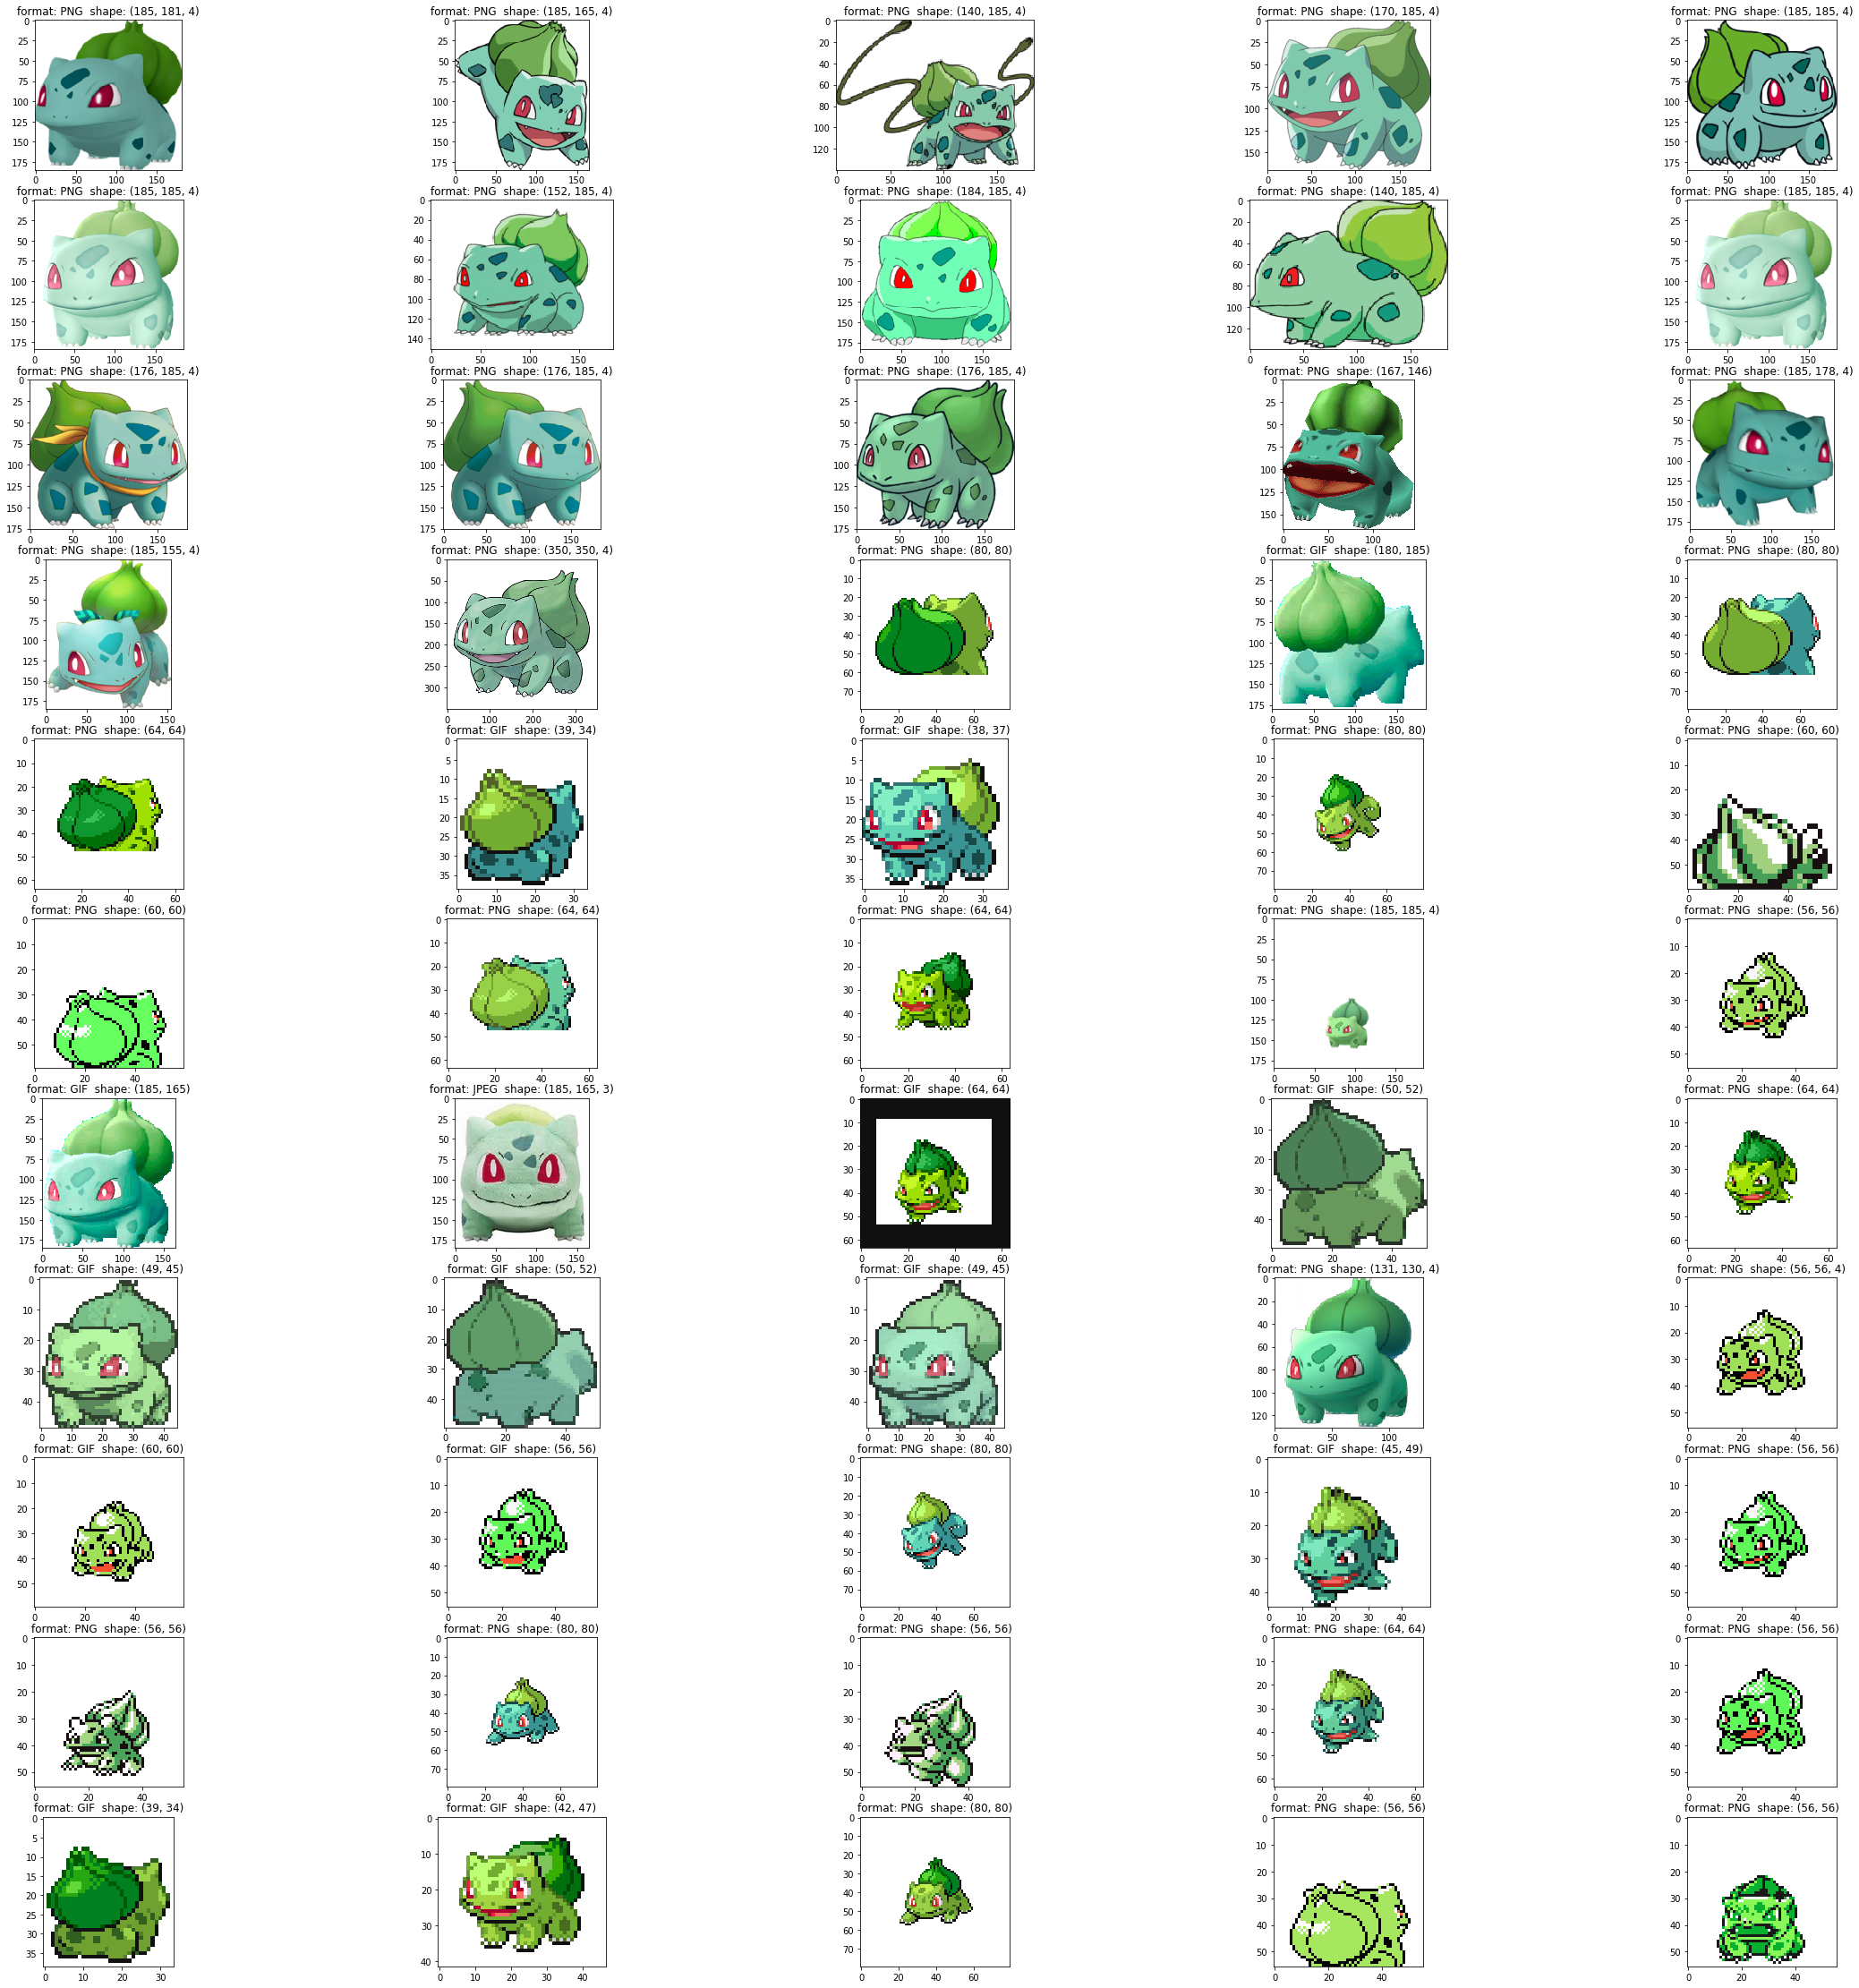

In [15]:
fig = plt.figure(figsize=(40, 40))
columns = 5
rows = 11
for i in range(len(onlyfiles)):
    img = Image.open('./Pokemon Dataset/001_Bulbasaur/{}'.format(onlyfiles[i]))
    image = np.asarray(Image.open('./Pokemon Dataset/001_Bulbasaur/{}'.format(onlyfiles[i])))
    fig.add_subplot(rows, columns, i + 1)
    plt.title("format: {}  shape: {}".format(img.format, image.shape))
    plt.imshow(img)
plt.show()

## unique elements of image shape and format in Pokemon Dataset

In [16]:
# In "Pokemon Dataset", there are three kinds of image format.
img_format = []
img_shape = []
for name in folder_name_list:
    path = './Pokemon Dataset/{}'.format(name)
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    for ele in onlyfiles:
        img = Image.open('./Pokemon Dataset/{}/{}'.format(name, ele))
        image = np.asarray(Image.open('./Pokemon Dataset/{}/{}'.format(name, ele)))
        img_format.append(img.format)
        img_shape.append(image.shape)
print(np.unique(img_format))
print(np.unique(img_shape))

['GIF' 'JPEG' 'PNG']
[(32, 32) (33, 42) (33, 71) ... (481, 350, 4) (497, 350, 4) (500, 338, 4)]


## Convert the images
1. convert .gif and .jpeg to .png file
2. save the file to './Pokemon Dataset (convert to png files)/folder_name_list'

In [17]:
folder_name_list

['001_Bulbasaur',
 '002_Ivysaur',
 '003_Venusaur',
 '004_Charmander',
 '005_Charmeleon',
 '006_Charizard',
 '007_Squirtle',
 '008_Wartortle',
 '009_Blastoise',
 '010_Caterpie',
 '011_Metapod',
 '012_Butterfree',
 '013_Weedle',
 '014_Kakuna',
 '015_Beedrill',
 '016_Pidgey',
 '017_Pidgeotto',
 '018_Pidgeot',
 '019_Rattata',
 '020_Raticate',
 '021_Spearow',
 '022_Fearow',
 '023_Ekans',
 '024_Arbok',
 '025_Pikachu',
 '026_Raichu',
 '027_Sandshrew',
 '028_Sandslash',
 '029_Nidoran♀',
 '030_Nidorina',
 '031_Nidoqueen',
 '032_Nidoran♂',
 '033_Nidorino',
 '034_Nidoking',
 '035_Clefairy',
 '036_Clefable',
 '037_Vulpix',
 '038_Ninetales',
 '039_Jigglypuff',
 '040_Wigglytuff',
 '041_Zubat',
 '042_Golbat',
 '043_Oddish',
 '044_Gloom',
 '045_Vileplume',
 '046_Paras',
 '047_Parasect',
 '048_Venonat',
 '049_Venomoth',
 '050_Diglett',
 '051_Dugtrio',
 '052_Meowth',
 '053_Persian',
 '054_Psyduck',
 '055_Golduck',
 '056_Mankey',
 '057_Primeape',
 '058_Growlithe',
 '059_Arcanine',
 '060_Poliwag',
 '061_P

In [18]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [19]:
pathlib.Path().absolute()

WindowsPath('C:/Users/songz/OneDrive/文件/University of bath 課程/semester 2/Research Project Preparation/dataset and code')

In [20]:
for i in folder_name_list:
    createFolder('./Pokemon Dataset (convert to png files)/{}/'.format(i))

In [21]:
for name in folder_name_list:
    path = './Pokemon Dataset/{}'.format(name)
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    for ele in onlyfiles:
        if ele[-3:] != 'png':
            img = Image.open('./Pokemon Dataset/{}/{}'.format(name, ele)).convert('RGB')  # convert to RGB
            img.save(r'./Pokemon Dataset (convert to png files)/{}/{}.png'.format(name,ele[:-4]))
        if ele[-3:] == 'png':
            img = Image.open('./Pokemon Dataset/{}/{}'.format(name, ele)).convert('RGB')
            img.save(r'./Pokemon Dataset (convert to png files)/{}/{}'.format(name,ele))
    print(name)

C:\Users\songz\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


001_Bulbasaur
002_Ivysaur
003_Venusaur
004_Charmander
005_Charmeleon
006_Charizard
007_Squirtle
008_Wartortle
009_Blastoise
010_Caterpie
011_Metapod
012_Butterfree
013_Weedle
014_Kakuna
015_Beedrill
016_Pidgey
017_Pidgeotto
018_Pidgeot
019_Rattata
020_Raticate
021_Spearow
022_Fearow
023_Ekans
024_Arbok
025_Pikachu
026_Raichu
027_Sandshrew
028_Sandslash
029_Nidoran♀
030_Nidorina
031_Nidoqueen
032_Nidoran♂
033_Nidorino
034_Nidoking
035_Clefairy
036_Clefable
037_Vulpix
038_Ninetales
039_Jigglypuff
040_Wigglytuff
041_Zubat
042_Golbat
043_Oddish
044_Gloom
045_Vileplume
046_Paras
047_Parasect
048_Venonat
049_Venomoth
050_Diglett
051_Dugtrio
052_Meowth
053_Persian
054_Psyduck
055_Golduck
056_Mankey
057_Primeape
058_Growlithe
059_Arcanine
060_Poliwag
061_Poliwhirl
062_Poliwrath
063_Abra
064_Kadabra
065_Alakazam
066_Machop
067_Machoke
068_Machamp
069_Bellsprout
070_Weepinbell
071_Victreebel
072_Tentacool
073_Tentacruel
074_Geodude
075_Graveler
076_Golem
077_Ponyta
078_Rapidash
079_Slowpoke
080_

664_Scatterbug
665_Spewpa
666_Vivillon
667_Litleo
668_Pyroar
669_Flabébé
670_Floette
671_Florges
672_Skiddo
673_Gogoat
674_Pancham
675_Pangoro
676_Furfrou
677_Espurr
678_Meowstic
679_Honedge
680_Doublade
681_Aegislash
682_Spritzee
683_Aromatisse
684_Swirlix
685_Slurpuff
686_Inkay
687_Malamar
688_Binacle
689_Barbaracle
690_Skrelp
691_Dragalge
692_Clauncher
693_Clawitzer
694_Helioptile
695_Heliolisk
696_Tyrunt
697_Tyrantrum
698_Amaura
699_Aurorus
700_Sylveon
701_Hawlucha
702_Dedenne
703_Carbink
704_Goomy
705_Sliggoo
706_Goodra
707_Klefki
708_Phantump
709_Trevenant
710_Pumpkaboo
711_Gourgeist
712_Bergmite
713_Avalugg
714_Noibat
715_Noivern
716_Xerneas
717_Yveltal
718_Zygarde
719_Diancie
720_Hoopa
721_Volcanion
722_Rowlet
723_Dartrix
724_Decidueye
725_Litten
726_Torracat
727_Incineroar
728_Popplio
729_Brionne
730_Primarina
731_Pikipek
732_Trumbeak
733_Toucannon
734_Yungoos
735_Gumshoos
736_Grubbin
737_Charjabug
738_Vikavolt
739_Crabrawler
740_Crabominable
741_Oricorio
742_Cutiefly
743_Ribo

## The size of the dataset

In [22]:
## summary the size
list_of_pokemon_image_size = []
for name in folder_name_list:
    path = './Pokemon Dataset (convert to png files)/{}'.format(name)
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    for i in range(len(onlyfiles)):
        image = np.asarray(Image.open('./Pokemon Dataset (convert to png files)/{}/{}'.format(name, onlyfiles[i])))
    list_of_pokemon_image_size.append(image.shape)

In [23]:
sorted(list_of_pokemon_image_size)

[(32, 32, 3),
 (33, 42, 3),
 (33, 71, 3),
 (34, 70, 3),
 (35, 76, 3),
 (42, 41, 3),
 (48, 46, 3),
 (49, 81, 3),
 (50, 50, 3),
 (51, 52, 3),
 (51, 67, 3),
 (54, 44, 3),
 (54, 58, 3),
 (54, 96, 3),
 (55, 70, 3),
 (55, 94, 3),
 (56, 44, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (56, 56, 3),
 (57, 38, 3),
 (58, 77, 3),
 (58, 107, 3),
 (59, 63, 3),
 (60, 34, 3),
 (63, 94, 3),
 (64, 43, 3),
 (64, 56, 3),
 (64, 64, 3),
 (64, 64, 3),
 (64, 64, 3),
 (64, 64, 3),
 (64, 64, 3),
 (64, 64, 3),
 (64, 64, 3),
 (64, 64, 3),
 (64, 64, 3),
 (64, 64, 3),
 (64, 64, 3),
 (64, 64, 3),
 (64, 64, 3),
 (64, 84, 3),
 (66, 59, 3),
 (67, 79, 3),
 (69, 63, 3),
 (69, 73, 3),
 (69, 127, 3),
 (70, 49, 3),
 (71, 49, 3),
 (72, 46, 3),
 (72, 94, 3),
 (73, 74, 3),
 (73, 74, 3),
 (73, 83, 3),
 (73, 123, 3),
 (74, 109, 3),
 (

In [24]:
# if image smaller than x, then we will not use them
# this section shows how many images will left in each pokemon
filter_standard = (90, 90, 3)

# filter_df = pd.DataFrame(columns = ['pokemon name', 'amount'])
count_list = []

for name in folder_name_list:
    path = './Pokemon Dataset (convert to png files)/{}'.format(name)
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    count = 0
    for i in range(len(onlyfiles)):
        image = np.asarray(Image.open('./Pokemon Dataset (convert to png files)/{}/{}'.format(name, onlyfiles[i])))
        if image.shape > filter_standard:
            count += 1
    count_list.append(count)

print('When we filter the images which bigger than {}'.format(filter_standard))        
print('We have {} pokemon containing more than 3 images'.format(len([i for i in count_list if i >= 3])))

When we filter the images which bigger than (90, 90, 3)
We have 847 pokemon containing more than 3 images


In [25]:
filter_df = pd.DataFrame({'pokemon name': folder_name_list, 'amount': count_list})
filter_df

,pokemon name,amount
0,001_Bulbasaur,22
1,002_Ivysaur,13
2,003_Venusaur,19
3,004_Charmander,22
4,005_Charmeleon,12
...,...,...
885,886_Drakloak,1
886,887_Dragapult,3
887,888_Zacian,8
888,889_Zamazenta,6


In [26]:
# sorted(count_list)

# Resize the images

# Visualization